# 0 - Exploration et découverte du jeu de données
---

In [1]:
# Import des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from imblearn.metrics import classification_report_imbalanced
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
# lire fichier weatherAUS.csv
df = pd.read_csv("weatherAUS.csv")


In [3]:
# Première informations sur les des données
display(df.info())
display(df.iloc[:,0:13].head())
display(df.iloc[:,13:].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

None

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0


,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
#Création de nouvelles colonnes contenant les mois, jours, années et année + mois 
#Définition des fonctions à appliquer à la colonne 'Date'
def get_day(date):
    splits = date.split('-')    
    day = splits[2]
    return day

def get_month(date):
    return date.split('-')[1]

def get_year(date):
    return date.split('-')[0]   
# Application des fonctions
days = df['Date'].apply(get_day)
months = df['Date'].apply(get_month)
years = df['Date'].apply(get_year)
# Création des nouvelles colonnes
df['day'] = days
df['month'] = months
df['year'] = years
df['year_month']= years+"-"+months

>L'Australie étant un pays immense pays, le climat varie d'une région à une autre Pour faciliter l'interprétation des données il parait important d'ajouter une variable "state" au dataset qui permettra de regrouper les localités en 8 zones géographiques.

In [5]:
#importation du fichier CSV contenant les variables qui nous intéressent
states = pd.read_csv('australian_states.csv',';')

C:\Users\g18756\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
#suppression de la colonne inutile
states.drop('Unnamed: 0',axis=1,inplace=True)
#fusion des deux DataFrames
df = pd.merge(df,states)

In [7]:
# changement de type de donnée des colonnes month, day, et year
df = df.astype({'year':'int64','month':'int64','day':'int64'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145460 entries, 0 to 145459
Data columns (total 28 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [8]:
#afin de faciliter la lecture de df nous allons l'afficher en 2 fois
display(df.iloc[:,0:13].head())
display(df.iloc[:,13:].head())

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0


,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year,year_month,State
0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008,2008-12,New South Wales
1,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008,2008-12,New South Wales
2,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008,2008-12,New South Wales
3,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008,2008-12,New South Wales
4,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008,2008-12,New South Wales


###  Analyse de la corrélation des variables numériques

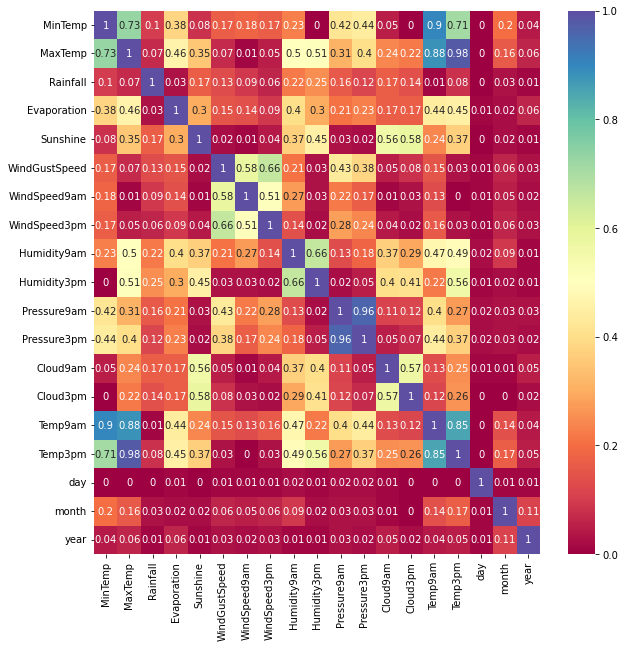

In [14]:
# Correlations entre variables numériques
data = round(df.corr().abs(),2)
#affichage dans une heatmap de la matrice de corrélation
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data,ax=ax,annot = True, cmap = "Spectral" );

On constate que plusieurs variables sont fortements corrélées notamment les variables concernant les différent relevés de températures, ou encore la pression athmosphérique selon les heures de la journée.  
Nous constatons également d'autres corrélations moins forte (0.5 à 0.7) entre l'ensoleillement,la couverture nuageuse et l'humidité de l'air, entre l'évaporation et et la température, entre l'humidité de l'air et la couverture nuageuse

In [ ]:
# Aperçu de l'équilibre des classes
df["RainTomorrow"].value_counts(normalize = True)*100

No     77.581878
Yes    22.418122
Name: RainTomorrow, dtype: float64

<IPython.core.display.Javascript object>


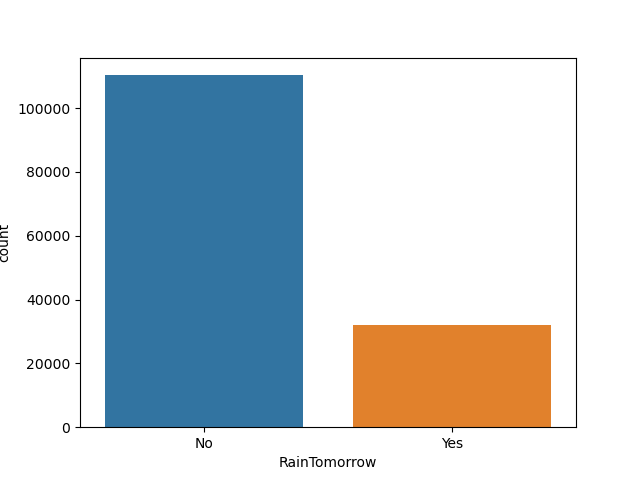

In [ ]:
# Répartition de la variable cible RainTomorrow
fig = plt.figure()
ax = fig.add_subplot(111)
sns.countplot(ax = ax, x = df["RainTomorrow"])
plt.show();

>**Nous constatons qu'à l'échelle de l'Australie il y a une majorité de jours sans pluie**

<IPython.core.display.Javascript object>


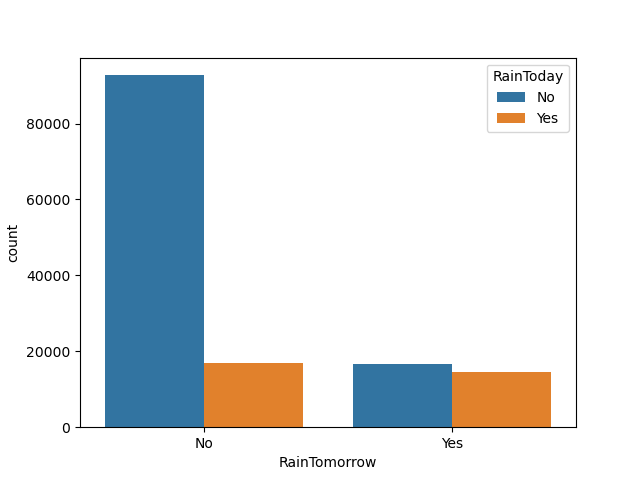

C:\Users\rpfal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [ ]:
#Répartion de RainTomorrow en fonction de RainToday
fig = plt.figure()
ax = fig.add_subplot(111)
sns.countplot(df.RainTomorrow,ax=ax,hue = df.RainToday)
plt.show()


>**Lorqu'il a plu, la probabilité qu'il ne pleuve pas le lendemain est 4 fois plus importante.
>A l'inverse lorsqu'il a plus, il y a autant de chance qu'il pleuve le lendemain qu'il ne pleuve pas.**

<IPython.core.display.Javascript object>


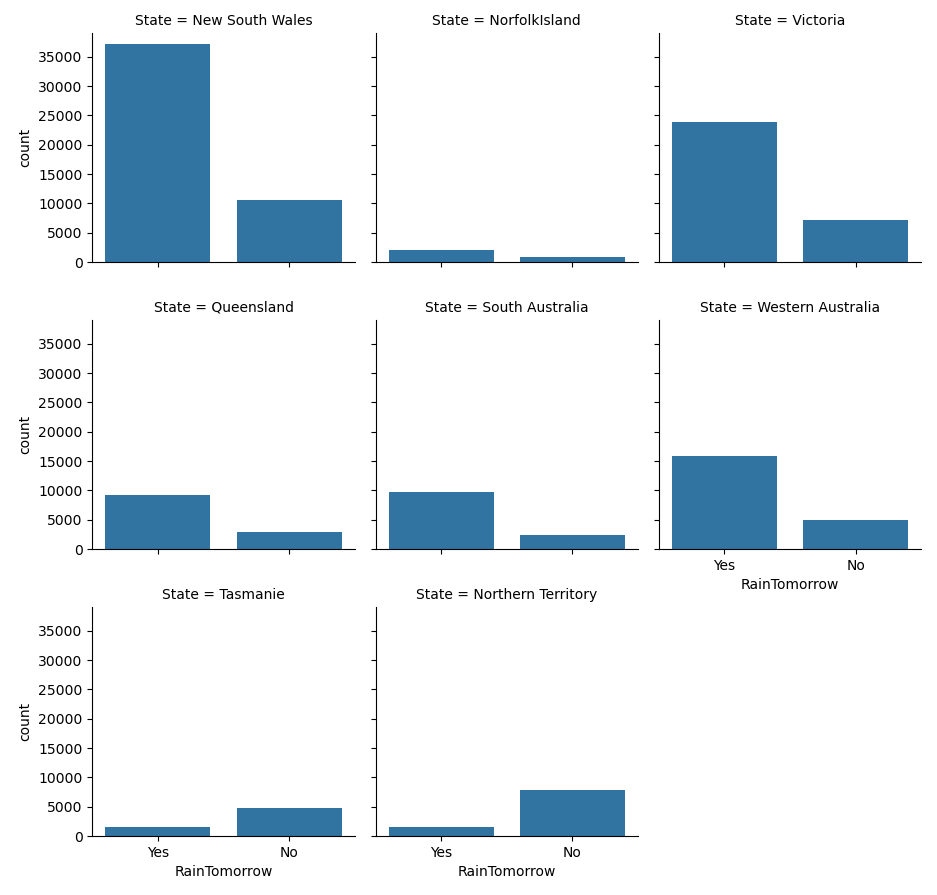

C:\Users\rpfal\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


In [ ]:
#Countplot de RainTomorrow par ville
u = sns.FacetGrid(df, col ='State', col_wrap = 3)
u.map(sns.countplot, 'RainTomorrow');

<IPython.core.display.Javascript object>


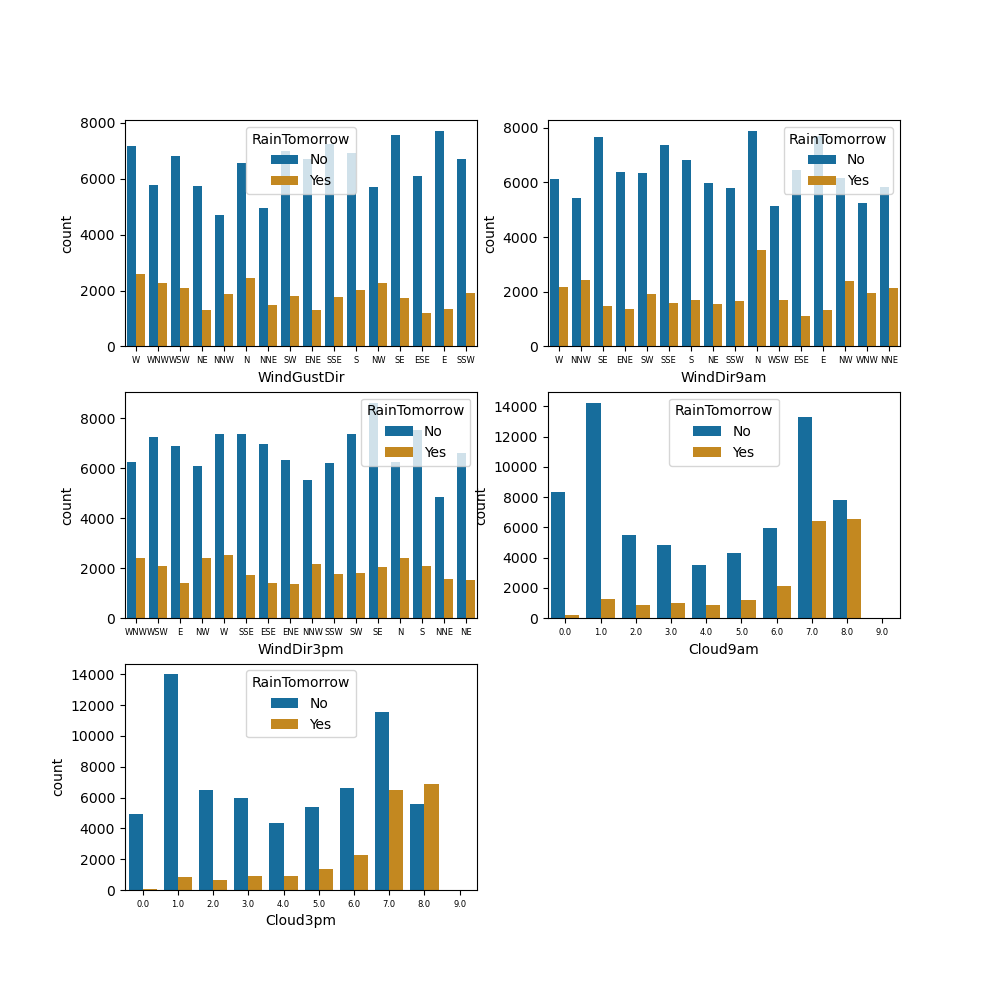

C:\Users\rpfal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rpfal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rpfal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rpfal\anaconda3\lib\si

In [ ]:
# Création d'un countplot avec par variable catégorielle ["WindGustDir", "WindDir9am", "WindDir3pm", "Cloud9am", "Cloud3pm"]
# en appliquant en discriminant avec la variable RainTomorrow
f = plt.figure(figsize=(10, 10))
gs = f.add_gridspec(3, 2)
ax = f.add_subplot(gs[0, 0])
sns.countplot(df.WindGustDir,ax=ax, palette = 'colorblind', hue = df.RainTomorrow)
plt.xticks(size = 6)
ax = f.add_subplot(gs[0, 1])
sns.countplot(df.WindDir9am,ax=ax,palette = 'colorblind', hue = df.RainTomorrow)
plt.xticks(size = 6)
ax = f.add_subplot(gs[1, 0])
sns.countplot(df.WindDir3pm,ax=ax,palette = 'colorblind', hue = df.RainTomorrow)
plt.xticks(size = 6)
ax = f.add_subplot(gs[1, 1])
sns.countplot(df.Cloud9am,ax=ax, palette = 'colorblind', hue = df.RainTomorrow)
plt.xticks(size = 6)
ax = f.add_subplot(gs[2, 0])
sns.countplot(df.Cloud3pm,ax=ax, palette = 'colorblind', hue = df.RainTomorrow)
plt.xticks(size = 6)
plt.show()

**Globalement on constate qu'il y a mois de vent la veille des jours de pluie et que plus la journée de la veille est nuageuse, plus il y a de chance qu'il pleuve le lendemain.**

In [ ]:
# Affichage des modalités des variables catégorielles et leur fréquence
cols = ["WindGustDir", "WindDir9am", "WindDir3pm", "Cloud9am", "Cloud3pm", "RainToday" ]
for col in cols:
    print(df[col].value_counts(normalize = True)*100)


W      13.439480
SE      6.546736
E       6.379358
N       6.352633
SSE     6.324503
S       6.293559
WSW     6.259802
SW      6.186662
SSW     6.055150
WNW     5.672572
NW      5.628266
ENE     5.620530
ESE     5.137384
NE      4.965083
NNW     4.614151
NNE     4.524133
Name: WindGustDir, dtype: float64
N      15.054187
SE      6.443355
E       6.346304
SSE     6.305514
NW      6.014361
S       5.972868
W       5.809006
SW      5.792831
NNE     5.589586
NNW     5.513633
ENE     5.439790
ESE     5.315311
NE      5.293510
SSW     5.237951
WNW     5.059321
WSW     4.812473
Name: WindDir9am, dtype: float64
SE     10.155915
W       6.970104
S       6.749981
WSW     6.560801
SW      6.457421
SSE     6.429290
N       6.095237
WNW     6.087501
NW      5.955286
ESE     5.894805
E       5.866674
NE      5.741492
SSW     5.633189
NNW     5.438383
ENE     5.432054
NNE     4.531869
Name: WindDir3pm, dtype: float64
4.437189    37.735332
7.000000    13.888869
1.000000    10.941467
8.000000    10.119

In [ ]:
pd.crosstab(features["RainToday"],target,normalize = 0)

RainTomorrow,No,Yes
RainToday,,
No,0.843956,0.156044
Yes,0.535940,0.464060


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


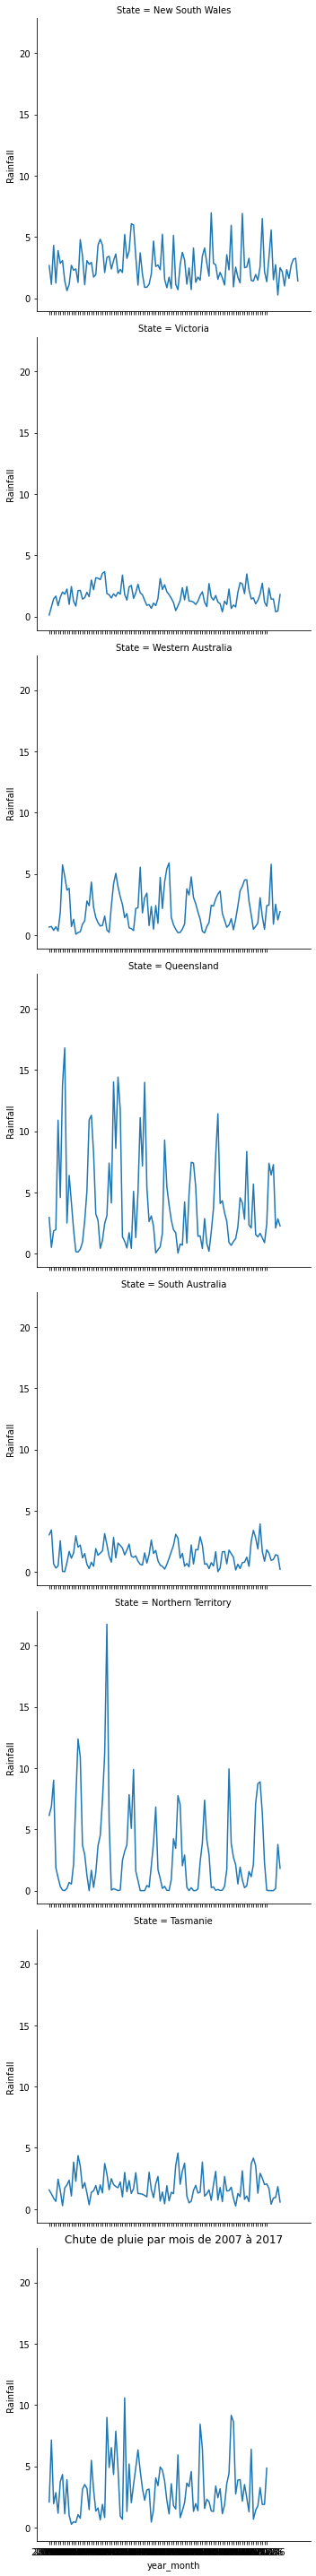

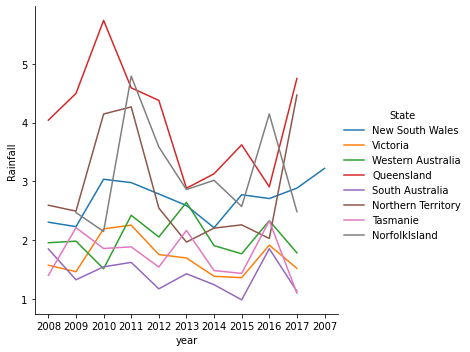

In [ ]:
#pluie en fonction des mois puis de l'année
sns.relplot(df.year_month,df.Rainfall,row = df.State, ci = None,kind = 'line', sizes=(20,20))
plt.title("Chute de pluie par mois de 2007 à 2017")
sns.relplot(df.year,df.Rainfall,hue = df.State, ci = None,kind = 'line')
plt.show()

<IPython.core.display.Javascript object>


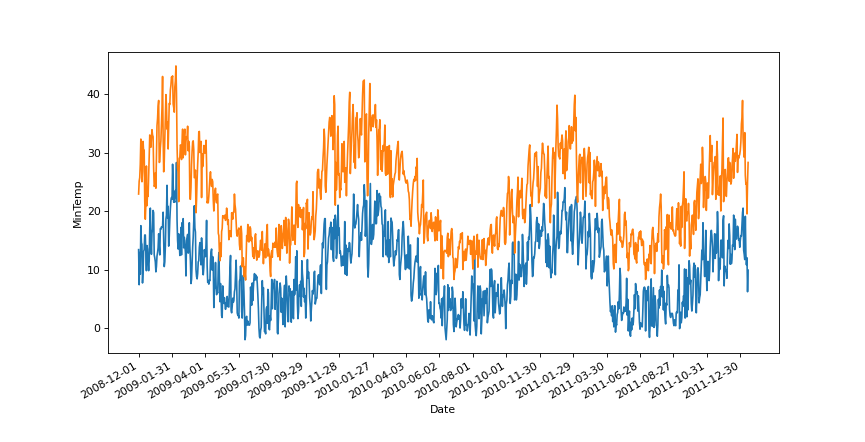

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.lineplot(ax = ax, x = 'Date', y = 'MinTemp', data = df.head(365*3))
sns.lineplot(ax = ax, x = 'Date', y = 'MaxTemp', data = df.head(365*3))
#Rotation des dates
#plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.gcf().autofmt_xdate()
#Pour n'afficher que tous les x dates
ax.set_xticks(ax.get_xticks()[::60]);

<IPython.core.display.Javascript object>


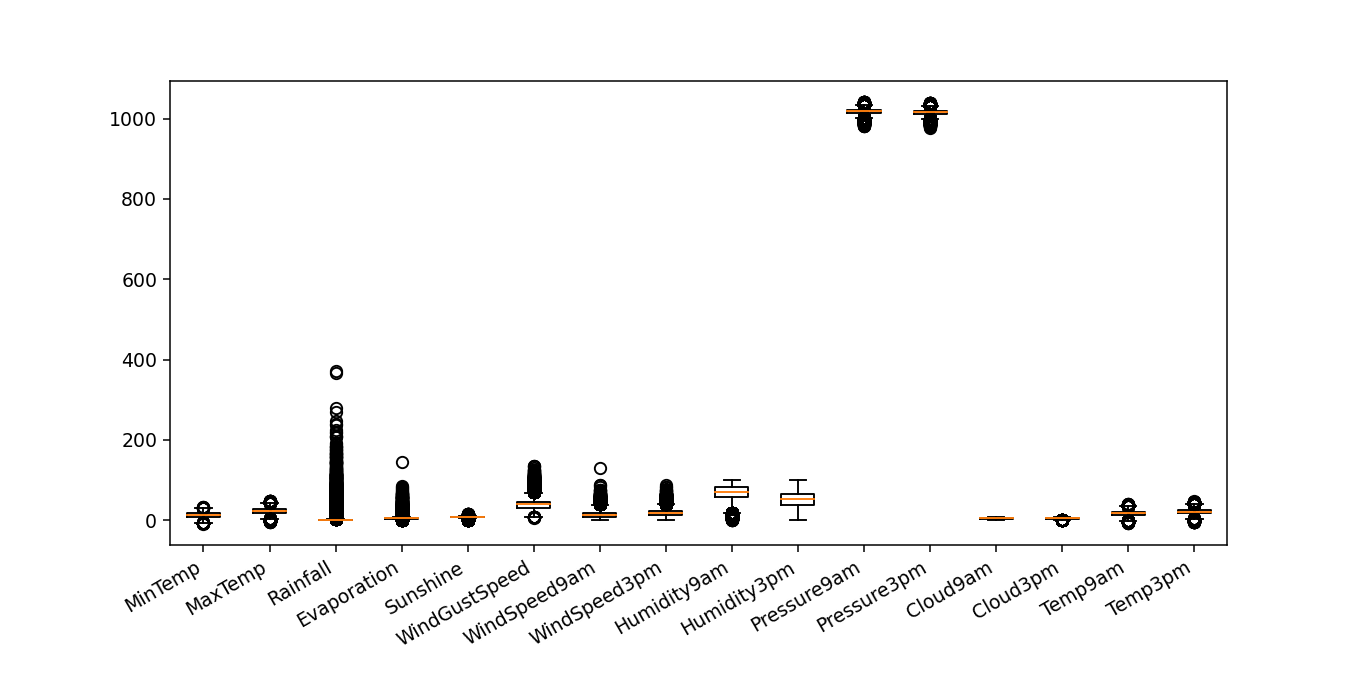

In [ ]:
plt.figure(figsize = (10,5))
databox = df.select_dtypes(include = "number")
labels = df.select_dtypes(include = "number").columns
plt.boxplot(databox, labels = labels )
plt.gcf().autofmt_xdate();

<IPython.core.display.Javascript object>


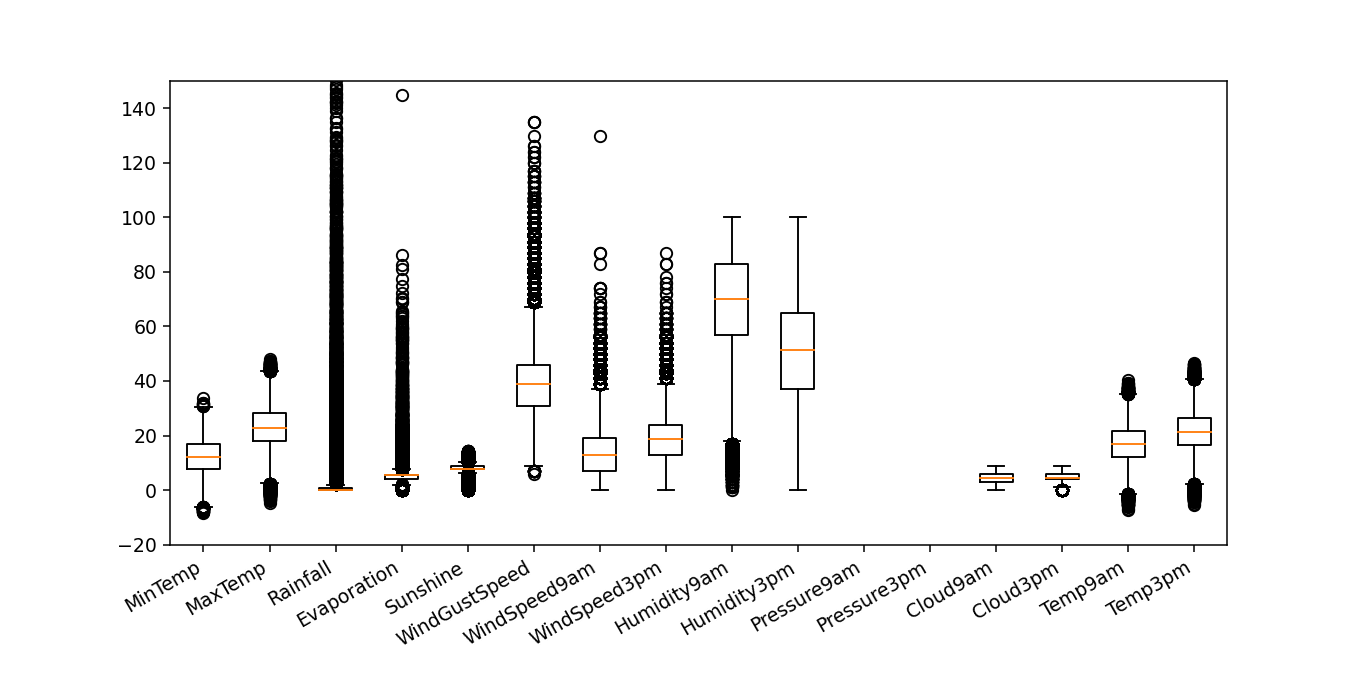

In [ ]:
plt.figure(figsize = (10,5))
databox = df.select_dtypes(include = "number")
labels = df.select_dtypes(include = "number").columns
plt.boxplot(databox, labels = labels )
plt.gcf().autofmt_xdate()
plt.ylim((-20, 150));

# 1 - PREPROCESSING

## 1.1 - Traitement des valeurs manquantes

> Nous constatons que 4 variables ont entre 38% et 48% de valeurs manquantes ce qui est conséquent. La variable cible "RainTomorrow" a quant à elle environ 2% de valeurs manquantes. Pour commencer nous ne conservons que les ligne étiquetées.






In [9]:
# Aperçu du % de données manquantes par variable
df.isnull().sum()/(df.shape[0])*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
day               0.000000
month             0.000000
year              0.000000
year_month        0.000000
State             0.000000
dtype: float64

In [10]:
# On ne garde dans un premier temps que les données étiquetées
df = df[(df["RainTomorrow"] == "No") | (df["RainTomorrow"] == "Yes") ]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 28 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null


>Pour le reste des valeurs manquantes nous utilisons le KNNImputer de scikit.learn, qui s'appuie sur l'algorithme de classification KNN afin de remplacer les valeurs manquantes par celles de leurs plus proches voisins.

Attention, le remplacement des valeurs manquantes par cette technique pourra avoir des conséquences sur notre modèle prédictif notamment en terme d'overfitting.

### 1.1.1 - Méthode KNNImputer

In [ ]:
#L'algorythme KNN ne fonctionne qu'avec des valeurs numériques, donc dans un premier temps nous choisissons certaines variables catégorielle à dichotomiser.
# Il s'agit des variables géographiques et temporelles.
df_knn = pd.get_dummies(df,columns=['State','Location','WindGustDir','WindDir9am','WindDir3pm'])
# puis nous exlcluons les variables de type 'object
df_knn= df_knn.select_dtypes(exclude = 'object')

In [ ]:
# importation de la classe KNNImputer
from sklearn.impute import KNNImputer
# création du classifieur
imputer = KNNImputer(n_neighbors=2)
# entrainement du classifieur sur df_knn
df_knn = imputer.fit_transform(df_knn)


In [ ]:
# suppression des variables dichotomisées
df_knn2 = df_knn[:,:19]
df_knn2= pd.DataFrame(df_knn2)
dict={}
for c1,c2 in zip(df_knn2.columns,df.select_dtypes(include = "number").columns):
    dict[c1]=c2
df_knn2.rename(columns=dict,inplace=True)

In [ ]:
# fusion df et df_knn
df_knn2 = pd.concat([df_knn2,df.select_dtypes(exclude = "number")],axis=1)
df_knn2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6538357 entries, 0 to 6538356
Data columns (total 27 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Date           object 
 1   Location       object 
 2   MinTemp        float64
 3   MaxTemp        float64
 4   Rainfall       float64
 5   Evaporation    float64
 6   Sunshine       float64
 7   WindGustDir    object 
 8   WindGustSpeed  float64
 9   WindDir9am     object 
 10  WindDir3pm     object 
 11  WindSpeed9am   float64
 12  WindSpeed3pm   float64
 13  Humidity9am    float64
 14  Humidity3pm    float64
 15  Pressure9am    float64
 16  Pressure3pm    float64
 17  Cloud9am       float64
 18  Cloud3pm       float64
 19  Temp9am        float64
 20  Temp3pm        float64
 21  RainToday      object 
 22  RainTomorrow   object 
 23  day            int64  
 24  month          int64  
 25  year           int64  
 26  year_month     object 
dtypes: float64(16), int64(3), object(8)
memory usage: 1.4+ GB


In [ ]:
#l'algorytme knn fonctionne uniquement pour les variables continues. Pour les variables catégorielles nous imputerons la modalités la plus fréquente de la variable en fonction de la variable 'State'
df_1 = df_knn2[df_knn2['State']=='New South Wales']
for col in (df_1.columns):
  df_1[col].fillna(df_1[col].mode()[0],inplace=True)
df_2 = df_knn2[df_knn2['State']=='Victoria']
for col in (df_2.columns):
  df_2[col].fillna(df_2[col].mode()[0],inplace=True)
df_3 = df_knn2[df_knn2['State']=='Western Australia']
for col in (df_3.columns):
  df_3[col].fillna(df_3[col].mode()[0],inplace=True)
df_4 = df_knn2[df_knn2['State']=='Queensland']
for col in (df_4.columns):
  df_4[col].fillna(df_4[col].mode()[0],inplace=True)
df_5 = df_knn2[df_knn2['State']=='South Australia']
for col in (df_5.columns):
  df_5[col].fillna(df_5[col].mode()[0],inplace=True)
df_6 = df_knn2[df_knn2['State']=='Northern Territory']
for col in (df_6.columns):
  df_6[col].fillna(df_6[col].mode()[0],inplace=True)
df_7 = df_knn2[df_knn2['State']=='Tasmanie']
for col in (df_7.columns):
  df_7[col].fillna(df_7[col].mode()[0],inplace=True)
df_8 = df_knn2[df_knn2['State']=='NorfolkIsland']
for col in (df_8.columns):
  df_8[col].fillna(df_8[col].mode()[0],inplace=True)

In [ ]:
#Nous concaténons l'ensemble des sous ensemble et nous vérifion qu'il n'y a plus de valeurs manquantes
df_knnvf = pd.concat([df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8],axis=0)
df_knnvf.info()

In [ ]:
#écriture d'un fichier csv à partir de df
df.to_csv('/content/drive/My Drive/07. FEV22_BDS_Météo/Etape#1_Audit_donnees/W_Aus_Na_knn.csv')

### 1.1.2 - Imputation de la moyene ou de la modalité la plus fréquente
En attendant d'arriver à faire fonctionner KNNImputer, nous imputons aux valeurs manquantes la moyennes de chaque variable numérique en fonction de la variable 'State'.
Et nous imputons la modalités la plus fréquente de chaque variable catégorielle en fonction de la variable 'State'.

In [11]:
df['State'].value_counts()
df_1 = df[df['State']=='New South Wales']
df_1.fillna(df_1.mean(),inplace = True)
for col in (df_1.columns):
  df_1[col].fillna(df_1[col].mode()[0],inplace=True)
df_2 = df[df['State']=='Victoria']
df_2.fillna(df_2.mean(),inplace = True)
for col in (df_2.columns):
  df_2[col].fillna(df_2[col].mode()[0],inplace=True)
df_3 = df[df['State']=='Western Australia']
df_3.fillna(df_3.mean(),inplace = True)
for col in (df_3.columns):
  df_3[col].fillna(df_3[col].mode()[0],inplace=True)
df_4 = df[df['State']=='Queensland']
df_4.fillna(df_4.mean(),inplace = True)
for col in (df_4.columns):
  df_4[col].fillna(df_4[col].mode()[0],inplace=True)
df_5 = df[df['State']=='South Australia']
df_5.fillna(df_5.mean(),inplace = True)
for col in (df_5.columns):
  df_5[col].fillna(df_5[col].mode()[0],inplace=True)
df_6 = df[df['State']=='Northern Territory']
df_6.fillna(df_6.mean(),inplace = True)
for col in (df_6.columns):
  df_6[col].fillna(df_6[col].mode()[0],inplace=True)
df_7 = df[df['State']=='Tasmanie']
df_7.fillna(df_7.mean(),inplace = True)
for col in (df_7.columns):
  df_7[col].fillna(df_7[col].mode()[0],inplace=True)
df_8 = df[df['State']=='NorfolkIsland']
df_8.fillna(df_8.mean(),inplace = True)
for col in (df_8.columns):
  df_8[col].fillna(df_8[col].mode()[0],inplace=True)

C:\Users\g18756\AppData\Local\Temp/ipykernel_12476/3465521172.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_1.fillna(df_1.mean(),inplace = True)
C:\Users\g18756\Anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\g18756\AppData\Local\Temp/ipykernel_12476/3465521172.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_2.fillna(df_2.mean(),inplace = True)
C:\Users\g

In [12]:
#Nous concaténons l'ensemble des sous ensemble et nous vérifions qu'il n'y a plus de valeurs manquantes
df = pd.concat([df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8],axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 24127
Data columns (total 28 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        142193 non-null  float64
 3   MaxTemp        142193 non-null  float64
 4   Rainfall       142193 non-null  float64
 5   Evaporation    142193 non-null  float64
 6   Sunshine       142193 non-null  float64
 7   WindGustDir    142193 non-null  object 
 8   WindGustSpeed  142193 non-null  float64
 9   WindDir9am     142193 non-null  object 
 10  WindDir3pm     142193 non-null  object 
 11  WindSpeed9am   142193 non-null  float64
 12  WindSpeed3pm   142193 non-null  float64
 13  Humidity9am    142193 non-null  float64
 14  Humidity3pm    142193 non-null  float64
 15  Pressure9am    142193 non-null  float64
 16  Pressure3pm    142193 non-null  float64
 17  Cloud9am       142193 non-null

In [ ]:
#écriture d'un fichier csv à partir de df
df.to_csv('/content/drive/My Drive/07. FEV22_BDS_Météo/Etape#1_Audit_donnees/W_Aus_Na_mean.csv')

In [13]:
# Quelques statistiques sur les variables numériques
df.describe().round()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,day,month,year
count,142193.0,142193.0,142193.0,142193.0,142193.0,142193.0,142193.0,142193.0,142193.0,142193.0,142193.0,142193.0,142193.0,142193.0,142193.0,142193.0,142193.0,142193.0,142193.0
mean,12.0,23.0,2.0,5.0,8.0,40.0,14.0,19.0,69.0,51.0,1018.0,1015.0,4.0,4.0,17.0,22.0,16.0,6.0,2013.0
std,6.0,7.0,8.0,3.0,3.0,13.0,9.0,9.0,19.0,21.0,7.0,7.0,2.0,2.0,6.0,7.0,9.0,3.0,3.0
min,-8.0,-5.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,980.0,977.0,0.0,0.0,-7.0,-5.0,1.0,1.0,2007.0
25%,8.0,18.0,0.0,4.0,7.0,31.0,7.0,13.0,57.0,37.0,1014.0,1011.0,3.0,4.0,12.0,17.0,8.0,3.0,2011.0
50%,12.0,23.0,0.0,5.0,8.0,39.0,13.0,18.0,70.0,52.0,1018.0,1016.0,4.0,4.0,17.0,21.0,16.0,6.0,2013.0
75%,17.0,28.0,1.0,6.0,9.0,46.0,19.0,24.0,83.0,65.0,1022.0,1019.0,6.0,6.0,22.0,26.0,23.0,9.0,2015.0
max,34.0,48.0,371.0,145.0,14.0,135.0,130.0,87.0,100.0,100.0,1041.0,1040.0,9.0,9.0,40.0,47.0,31.0,12.0,2017.0


## 1.2 - Preparation des données (avec NaN mean)

In [2]:
df = pd.read_csv("W_Aus_Na_mean.csv", index_col = 0)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year,year_month,State
0,2008-12-01,Albury,13.4,22.9,0.6,5.656849,7.658137,W,44.0,W,...,4.409605,16.9,21.8,No,No,1,12,2008,2008-12,New South Wales
1,2008-12-02,Albury,7.4,25.1,0.0,5.656849,7.658137,WNW,44.0,NNW,...,4.409605,17.2,24.3,No,No,2,12,2008,2008-12,New South Wales
2,2008-12-03,Albury,12.9,25.7,0.0,5.656849,7.658137,WSW,46.0,W,...,2.000000,21.0,23.2,No,No,3,12,2008,2008-12,New South Wales
3,2008-12-04,Albury,9.2,28.0,0.0,5.656849,7.658137,NE,24.0,SE,...,4.409605,18.1,26.5,No,No,4,12,2008,2008-12,New South Wales
4,2008-12-05,Albury,17.5,32.3,1.0,5.656849,7.658137,W,41.0,ENE,...,8.000000,17.8,29.7,No,No,5,12,2008,2008-12,New South Wales


In [3]:
# Suppression de colonnes jugées inutiles dans un premier temps
df = df.drop(["Date", "year_month", "State"], axis = 1)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,Albury,13.4,22.9,0.6,5.656849,7.658137,W,44.0,W,WNW,...,1007.1,8.000000,4.409605,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,5.656849,7.658137,WNW,44.0,NNW,WSW,...,1007.8,4.301218,4.409605,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,5.656849,7.658137,WSW,46.0,W,WSW,...,1008.7,4.301218,2.000000,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,5.656849,7.658137,NE,24.0,SE,E,...,1012.8,4.301218,4.409605,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,5.656849,7.658137,W,41.0,ENE,NW,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,5,12,2008


In [4]:
# Centrer et réduire les variables numériques

df_num = df.select_dtypes(include="number")

scaler = preprocessing.StandardScaler()
df[df_num.columns] = scaler.fit_transform(df_num)
df[df_num.columns].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,day,month,year
count,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05
mean,4.248991e-15,1.255496e-15,1.959453e-14,-9.506191e-15,1.927518e-15,1.862336e-14,-2.481326e-15,1.143313e-14,7.733410e-15,-1.081287e-15,2.138845e-14,3.157990e-14,8.078936e-15,2.221239e-15,-4.442106e-16,4.187693e-15,6.803613e-17,3.354040e-16,-2.620844e-14
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-3.237132e+00,-3.941685e+00,-2.790814e-01,-1.695714e+00,-2.756000e+00,-2.584972e+00,-1.580890e+00,-2.135267e+00,-3.635465e+00,-2.499106e+00,-5.506711e+00,-5.711951e+00,-1.930443e+00,-2.110152e+00,-3.735512e+00,-3.933550e+00,-1.672526e+00,-1.576698e+00,-2.266181e+00
25%,-7.176932e-01,-7.492074e-01,-2.790814e-01,-4.472040e-01,-3.081017e-01,-6.823403e-01,-7.901003e-01,-6.448391e-01,-6.257708e-01,-7.000545e-01,-6.202723e-01,-6.419684e-01,-6.235371e-01,-3.208477e-01,-7.235397e-01,-7.286280e-01,-8.769015e-01,-9.930106e-01,-6.921509e-01
50%,-2.915099e-02,-7.752918e-02,-2.790814e-01,-1.022568e-02,1.193236e-02,-7.349829e-02,-1.122806e-01,-3.445973e-02,6.065070e-02,2.929092e-02,4.635091e-02,7.445747e-02,-5.668080e-02,-3.631770e-02,-4.391515e-02,-7.189230e-02,3.238369e-02,-1.174800e-01,9.486436e-02
75%,7.219860e-01,6.993616e-01,-1.841083e-01,2.055637e-01,4.886881e-01,4.592385e-01,5.655391e-01,6.162920e-01,7.470721e-01,6.613903e-01,6.087409e-01,6.143105e-01,6.833688e-01,7.116441e-01,6.974935e-01,6.780574e-01,8.280083e-01,7.580506e-01,8.818796e-01
max,3.397911e+00,3.498053e+00,4.376469e+01,4.356276e+01,2.484833e+00,7.232606e+00,1.310520e+01,7.839134e+00,1.644700e+00,2.363196e+00,3.451760e+00,3.635362e+00,1.990275e+00,2.122542e+00,3.585898e+00,3.621945e+00,1.737293e+00,1.633581e+00,1.668895e+00


In [5]:
# Remplacer la variable cible par des 0 pour No et des 1 pour Yes
df["RainTomorrow"] = df["RainTomorrow"].replace({"No":0, "Yes":1})
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,Albury,0.189931,-0.046019,-0.207852,0.069944,0.011932,W,0.307028,W,WNW,...,-1.225241,1.554639,-0.036318,-0.013023,0.010969,No,0,-1.672526,1.633581,-1.872674
1,Albury,-0.748991,0.263385,-0.279081,0.069944,0.011932,WNW,0.307028,NNW,WSW,...,-1.120551,-0.056681,-0.036318,0.033315,0.373517,No,0,-1.558865,1.633581,-1.872674
2,Albury,0.111687,0.347767,-0.279081,0.069944,0.011932,WSW,0.459238,W,WSW,...,-0.985949,-0.056681,-1.169553,0.620263,0.213996,No,0,-1.445205,1.633581,-1.872674
3,Albury,-0.467314,0.671234,-0.279081,0.069944,0.011932,NE,-1.215077,SE,E,...,-0.372766,-0.056681,-0.036318,0.172329,0.692559,No,0,-1.331544,1.633581,-1.872674
4,Albury,0.831527,1.275976,-0.160365,0.069944,0.011932,W,0.078712,ENE,NW,...,-1.389753,1.119004,1.652243,0.125991,1.156621,No,0,-1.217883,1.633581,-1.872674


In [6]:
# Remplacer chaque variable catégorielle par autant de variables indicatrices que de modalité
nom_col_var_cat = df.select_dtypes(include="dtype").columns

df = df.join(pd.get_dummies(df[nom_col_var_cat]))
df = df.drop(nom_col_var_cat, axis = 1)

df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,0.189931,-0.046019,-0.207852,0.069944,0.011932,0.307028,0.678509,0.616292,0.113452,-1.429400,...,0,0,0,0,0,0,1,0,1,0
1,-0.748991,0.263385,-0.279081,0.069944,0.011932,0.307028,-1.129010,0.386995,-1.312192,-1.283531,...,0,0,0,0,0,0,0,1,1,0
2,0.111687,0.347767,-0.279081,0.069944,0.011932,0.459238,0.565539,0.845589,-1.629002,-1.040416,...,0,0,0,0,0,0,0,1,1,0
3,-0.467314,0.671234,-0.279081,0.069944,0.011932,-1.215077,-0.338220,-1.103432,-1.259391,-1.721138,...,0,0,0,0,0,0,0,0,1,0
4,0.831527,1.275976,-0.160365,0.069944,0.011932,0.078712,-0.790100,0.157699,0.694270,-0.894547,...,0,0,0,0,0,0,0,0,1,0


In [7]:
# Séparation données explicatives et donnée cible
features = df.drop("RainTomorrow", axis = 1)
target = df["RainTomorrow"]

In [8]:
# Création des sets de train et de test
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(features, target, test_size = 0.2, random_state = 789)

In [9]:
# Création d'un set de PCA (avec nom différent pour utilisation plus tard)
pca = PCA(n_components = 0.85)

X_train_m_pca = pca.fit_transform(X_train_m)
X_test_m_pca = pca.transform(X_test_m)

X_train_m_pca.shape

(113754, 20)

## 1.3 - Preparation des données (avec NaN knnImputer)

In [10]:
df = pd.read_csv("W_Aus_Na_knn.csv", index_col = 0)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year,year_month,State
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,NaN,16.9,21.8,No,No,1,12,2008,2008-12,New South Wales
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,NaN,17.2,24.3,No,No,2,12,2008,2008-12,New South Wales
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,2.0,21.0,23.2,No,No,3,12,2008,2008-12,New South Wales
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,NaN,18.1,26.5,No,No,4,12,2008,2008-12,New South Wales
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,8.0,17.8,29.7,No,No,5,12,2008,2008-12,New South Wales


In [11]:
# Suppression de colonnes jugées inutiles dans un premier temps
df = df.drop(["Date", "year_month", "State"], axis = 1)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008


In [12]:
# Centrer et réduire les variables numériques

df_num = df.select_dtypes(include="number")

scaler = preprocessing.StandardScaler()
df[df_num.columns] = scaler.fit_transform(df_num)
df[df_num.columns].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,day,month,year
count,1.415560e+05,1.418710e+05,1.407870e+05,8.135000e+04,7.437700e+04,1.329230e+05,1.408450e+05,1.395630e+05,1.404190e+05,1.385830e+05,1.281790e+05,1.282120e+05,8.853600e+04,8.509900e+04,1.412890e+05,1.394670e+05,1.421930e+05,1.421930e+05,1.421930e+05
mean,4.023958e-16,2.660636e-14,-7.989890e-15,-1.860297e-15,-1.179415e-15,-3.981916e-15,6.158386e-15,6.127154e-15,-5.340500e-15,2.683480e-16,-1.263488e-14,-1.420331e-15,2.344824e-14,-1.924722e-14,3.114343e-16,-1.256616e-15,1.008908e-16,2.785023e-16,-2.191491e-14
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000006e+00,1.000007e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000006e+00,1.000006e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-3.230604e+00,-3.937677e+00,-2.776060e-01,-1.305911e+00,-2.016357e+00,-2.500914e+00,-1.574441e+00,-2.117109e+00,-3.613616e+00,-2.475399e+00,-5.228911e+00,-5.422780e+00,-1.536956e+00,-1.655201e+00,-3.725273e+00,-3.904427e+00,-1.672526e+00,-1.576698e+00,-2.266181e+00
25%,-7.162601e-01,-7.483968e-01,-2.776060e-01,-6.851658e-01,-7.205748e-01,-6.611566e-01,-7.873324e-01,-6.403925e-01,-6.216824e-01,-6.963562e-01,-6.690301e-01,-6.904143e-01,-1.190575e+00,-9.200734e-01,-7.219532e-01,-7.332878e-01,-8.769015e-01,-9.930106e-01,-6.921509e-01
50%,-2.911013e-02,-8.806126e-02,-2.776060e-01,-1.599194e-01,2.314285e-01,-7.243431e-02,-1.126677e-01,4.116906e-02,6.068847e-02,2.487746e-02,-7.565802e-03,-8.271485e-03,1.949466e-01,1.826178e-01,-4.428103e-02,-8.464564e-02,3.238369e-02,-1.174800e-01,9.486436e-02
75%,7.205080e-01,6.987216e-01,-1.831008e-01,4.608263e-01,7.867638e-01,5.898783e-01,5.619971e-01,6.091370e-01,7.430593e-01,6.980289e-01,6.679722e-01,6.738714e-01,8.877074e-01,9.177453e-01,7.103993e-01,6.793107e-01,8.280083e-01,7.580506e-01,8.818796e-01
max,3.391023e+00,3.494611e+00,4.354918e+01,3.331260e+01,1.818101e+00,6.992233e+00,1.304330e+01,7.765533e+00,1.635390e+00,2.332825e+00,3.285682e+00,3.459288e+00,1.580468e+00,1.652873e+00,3.575104e+00,3.605408e+00,1.737293e+00,1.633581e+00,1.668895e+00


In [13]:
# Remplacer la variable cible par des 0 pour No et des 1 pour Yes
df["RainTomorrow"] = df["RainTomorrow"].replace({"No":0, "Yes":1})
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,Albury,0.189528,-0.045912,-0.206727,NaN,NaN,W,0.295517,W,WNW,...,-1.159388,1.234088,NaN,-0.013478,0.016254,No,0,-1.672526,1.633581,-1.872674
1,Albury,-0.747494,0.263181,-0.277606,NaN,NaN,WNW,0.295517,NNW,WSW,...,-1.059908,NaN,NaN,0.032727,0.376611,No,0,-1.558865,1.633581,-1.872674
2,Albury,0.111443,0.347479,-0.277606,NaN,NaN,WSW,0.442698,W,WSW,...,-0.932007,NaN,-0.920073,0.617989,0.218054,No,0,-1.445205,1.633581,-1.872674
3,Albury,-0.466387,0.670622,-0.277606,NaN,NaN,NE,-1.176289,SE,E,...,-0.349343,NaN,NaN,0.171342,0.693725,No,0,-1.331544,1.633581,-1.872674
4,Albury,0.829827,1.274759,-0.159474,NaN,NaN,W,0.074746,ENE,NW,...,-1.315712,0.887707,1.285309,0.125137,1.154982,No,0,-1.217883,1.633581,-1.872674


In [14]:
# Remplacer chaque variable catégorielle par autant de variables indicatrices que de modalité
nom_col_var_cat = df.select_dtypes(include="dtype").columns

df = df.join(pd.get_dummies(df[nom_col_var_cat]))
df = df.drop(nom_col_var_cat, axis = 1)

df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,0.189528,-0.045912,-0.206727,NaN,NaN,0.295517,0.674441,0.609137,0.113179,-1.417590,...,0,0,0,0,0,0,1,0,1,0
1,-0.747494,0.263181,-0.277606,NaN,NaN,0.295517,-1.124665,0.381950,-1.304053,-1.273343,...,0,0,0,0,0,0,0,1,1,0
2,0.111443,0.347479,-0.277606,NaN,NaN,0.442698,0.561997,0.836324,-1.618994,-1.032932,...,0,0,0,0,0,0,0,1,1,0
3,-0.466387,0.670622,-0.277606,NaN,NaN,-1.176289,-0.337556,-1.094767,-1.251563,-1.706083,...,0,0,0,0,0,0,0,0,1,0
4,0.829827,1.274759,-0.159474,NaN,NaN,0.074746,-0.787332,0.154763,0.690569,-0.888685,...,0,0,0,0,0,0,0,0,1,0


In [15]:
# Séparation données explicatives et donnée cible
features = df.drop("RainTomorrow", axis = 1)
target = df["RainTomorrow"]

In [16]:
# Création des sets de train et de test
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(features, target, test_size = 0.2, random_state = 789)

In [ ]:
# Création d'un set de PCA (avec nom différent pour utilisation plus tard)
pca = PCA(n_components = 0.85)

X_train_k_pca = pca.fit_transform(X_train_k)
X_test_k_pca = pca.transform(X_test_k)

X_train_k_pca.shape

# 2 - MODELISATION

## 2.1 - Modele 1 : Regression Logistique

### 2.1.1 - Avec NaN mean

In [18]:
# Entrainement modèle 
lr = LogisticRegression(class_weight = 'balanced' )
lr.fit(X_train_m, y_train_m)

LogisticRegression(class_weight='balanced')

In [19]:
# Performances

# Score d'accuracy globale
print("train score :", lr.score(X_train_m, y_train_m))
print("test score :", lr.score(X_test_m,y_test_m))

# Matrice de confusion
y_pred = lr.predict(X_test_m)
cm = pd.crosstab(y_test_m, y_pred, rownames = ['Real'], colnames = ['Pred'])
display(cm)

# Autres métriques
print(classification_report_imbalanced(y_test_m, y_pred))

train score : 0.7941259208467395
test score : 0.7919054819086466


Pred,0,1
Real,,
0,17561,4536
1,1382,4960


                   pre       rec       spe        f1       geo       iba       sup

          0       0.93      0.79      0.78      0.86      0.79      0.62     22097
          1       0.52      0.78      0.79      0.63      0.79      0.62      6342

avg / total       0.84      0.79      0.78      0.80      0.79      0.62     28439



[1.99994819 0.99994819 0.99603596 ... 0.01853123 0.01849943 0.00245787]
0.8728844940958478


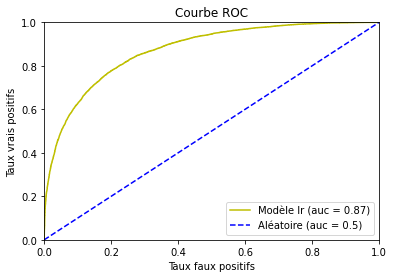

In [20]:
# ROC_curves
probs = lr.predict_proba(X_test_m)
fpr,tpr,seuils = roc_curve(y_test_m, probs[:,1], pos_label = 1)
roc_auc = auc(fpr,tpr)

print(seuils)
print(roc_auc)

fig = plt.figure(figsize=(6,4))

ax = fig.add_subplot(111)

ax.plot(fpr,tpr, 'y-', label = ('Modèle lr (auc = ' + str(round(roc_auc,2)) + ')'))
ax.plot([0,1],[0,1], 'b--', label = 'Aléatoire (auc = 0.5)')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_xlabel("Taux faux positifs")
ax.set_ylabel("Taux vrais positifs")
ax.set_title("Courbe ROC")
ax.legend(loc = "lower right");

In [21]:
# Tunning de l'hyperparamètre C

C_param_range = {'C':[0.001,0.01,0.1,1,10,100]}

lr = LogisticRegression(max_iter= 500, class_weight = 'balanced' )

grclf = GridSearchCV(estimator = lr,
                     param_grid = C_param_range)

grclf.fit(X_train_m, y_train_m)

grclf.best_params_

{'C': 1}

### 2.1.2 - Avec NaN knnImputer

In [ ]:
# Entrainement modèle 
lr = LogisticRegression(class_weight = 'balanced' )
lr.fit(X_train_k, y_train_k)

In [ ]:
# Performances

# Score d'accuracy globale
print("train score :", lr.score(X_train_k, y_train_k))
print("test score :", lr.score(X_test_k,y_test_k))

# Matrice de confusion
y_pred = lr.predict(X_test_k)
cm = pd.crosstab(y_test_k, y_pred, rownames = ['Real'], colnames = ['Pred'])
display(cm)

# Autres métriques
print(classification_report_imbalanced(y_test_k, y_pred))

In [ ]:
# ROC_curves
probs = lr.predict_proba(X_test_k)
fpr,tpr,seuils = roc_curve(y_test_k, probs[:,1], pos_label = 1)
roc_auc = auc(fpr,tpr)

print(seuils)
print(roc_auc)

fig = plt.figure(figsize=(6,4))

ax = fig.add_subplot(111)

ax.plot(fpr,tpr, 'y-', label = ('Modèle lr (auc = ' + str(round(roc_auc,2)) + ')'))
ax.plot([0,1],[0,1], 'b--', label = 'Aléatoire (auc = 0.5)')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_xlabel("Taux faux positifs")
ax.set_ylabel("Taux vrais positifs")
ax.set_title("Courbe ROC")
ax.legend(loc = "lower right");

## 2.2 - Classification Knn

### 2.2.1 - Avec NaN mean

In [22]:
from sklearn import neighbors
clf_knn = neighbors.KNeighborsClassifier(n_neighbors = 7, metric='minkowski' )
clf_knn.fit(X_train_m, y_train_m)

KNeighborsClassifier(n_neighbors=7)

In [23]:
# Performances

# Score d'accuracy globale
print("test score :", clf_knn.score(X_test_m,y_test_m))

# Matrice de confusion
y_pred = clf_knn.predict(X_test_m)
cm = pd.crosstab(y_test_m, y_pred, rownames = ['Real'], colnames = ['Pred'])
display(cm)

# Autres métriques
print(classification_report_imbalanced(y_test_m, y_pred))

test score : 0.8435950631175498


Pred,0,1
Real,,
0,20901,1196
1,3252,3090


                   pre       rec       spe        f1       geo       iba       sup

          0       0.87      0.95      0.49      0.90      0.68      0.48     22097
          1       0.72      0.49      0.95      0.58      0.68      0.44      6342

avg / total       0.83      0.84      0.59      0.83      0.68      0.47     28439



[2.         1.         0.85714286 0.71428571 0.57142857 0.42857143
 0.28571429 0.14285714 0.        ]
0.8447082897748491


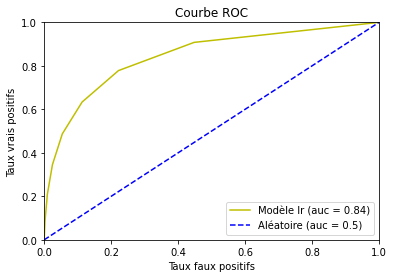

In [24]:
# ROC_curves
probs = clf_knn.predict_proba(X_test_m)
fpr,tpr,seuils = roc_curve(y_test_m, probs[:,1], pos_label = 1)
roc_auc = auc(fpr,tpr)

print(seuils)
print(roc_auc)

fig = plt.figure(figsize=(6,4))

ax = fig.add_subplot(111)

ax.plot(fpr,tpr, 'y-', label = ('Modèle lr (auc = ' + str(round(roc_auc,2)) + ')'))
ax.plot([0,1],[0,1], 'b--', label = 'Aléatoire (auc = 0.5)')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_xlabel("Taux faux positifs")
ax.set_ylabel("Taux vrais positifs")
ax.set_title("Courbe ROC")
ax.legend(loc = "lower right");

### 2.2.2 - Avec NaN knnImputer

In [ ]:
from sklearn import neighbors
clf_knn = neighbors.KNeighborsClassifier(n_neighbors = 7, metric='minkowski' )
clf_knn.fit(X_train_k, y_train_k)

In [ ]:
# Performances

# Score d'accuracy globale
print("test score :", clf_knn.score(X_test_k,y_test_k))

# Matrice de confusion
y_pred = clf_knn.predict(X_test_k)
cm = pd.crosstab(y_test_k, y_pred, rownames = ['Real'], colnames = ['Pred'])
display(cm)

# Autres métriques
print(classification_report_imbalanced(y_test_k, y_pred))

In [ ]:
# ROC_curves
probs = clf_knn.predict_proba(X_test_k)
fpr,tpr,seuils = roc_curve(y_test_k, probs[:,1], pos_label = 1)
roc_auc = auc(fpr,tpr)

print(seuils)
print(roc_auc)

fig = plt.figure(figsize=(6,4))

ax = fig.add_subplot(111)

ax.plot(fpr,tpr, 'y-', label = ('Modèle lr (auc = ' + str(round(roc_auc,2)) + ')'))
ax.plot([0,1],[0,1], 'b--', label = 'Aléatoire (auc = 0.5)')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_xlabel("Taux faux positifs")
ax.set_ylabel("Taux vrais positifs")
ax.set_title("Courbe ROC")
ax.legend(loc = "lower right");

## 2.3 - La classification avec SVM


### 2.3.1 - Avec NaN mean

In [25]:
# Entrainement modèle 
clf_svc = SVC(class_weight='balanced')
clf_svc.fit(X_train_m_pca, y_train_m)

SVC(class_weight='balanced')

In [26]:
# Performances

# Score d'accuracy globale
print("train score :", clf_svc.score(X_train_m_pca, y_train_m))
print("test score :", clf_svc.score(X_test_m_pca,y_test_m))

# Matrice de confusion
y_pred = clf_svc.predict(X_test_m_pca)
cm = pd.crosstab(y_test_m, y_pred, rownames = ['Real'], colnames = ['Pred'])
display(cm)

# Autres métriques
print(classification_report_imbalanced(y_test_m, y_pred))

train score : 0.8129472370202366
test score : 0.8018566053658708


Pred,0,1
Real,,
0,17749,4348
1,1287,5055


                   pre       rec       spe        f1       geo       iba       sup

          0       0.93      0.80      0.80      0.86      0.80      0.64     22097
          1       0.54      0.80      0.80      0.64      0.80      0.64      6342

avg / total       0.84      0.80      0.80      0.81      0.80      0.64     28439



In [28]:
# Avec noyau 'rbf'
clf_svc = SVC(kernel = 'rbf', class_weight='balanced')
clf_svc.fit(X_train_m_pca, y_train_m)

SVC(class_weight='balanced')

In [29]:
# Performances

# Score d'accuracy globale
print("train score :", clf_svc.score(X_train_m_pca, y_train_m))
print("test score :", clf_svc.score(X_test_m_pca,y_test_m))

# Matrice de confusion
y_pred = clf_svc.predict(X_test_m_pca)
cm = pd.crosstab(y_test_m, y_pred, rownames = ['Real'], colnames = ['Pred'])
display(cm)

# Autres métriques
print(classification_report_imbalanced(y_test_m, y_pred))

train score : 0.8129472370202366
test score : 0.8018566053658708


Pred,0,1
Real,,
0,17749,4348
1,1287,5055


                   pre       rec       spe        f1       geo       iba       sup

          0       0.93      0.80      0.80      0.86      0.80      0.64     22097
          1       0.54      0.80      0.80      0.64      0.80      0.64      6342

avg / total       0.84      0.80      0.80      0.81      0.80      0.64     28439



## 2.4 - La classification avec RandomForest

In [ ]:
from sklearn import ensemble 

In [ ]:
# Création d'un clasifieur avec RandomForestClassifier
clf_rf = ensemble.RandomForestClassifier(n_jobs=-1,random_state=321)
#Entraîner l'algorithme sur l'ensemble d'entraînement (X_train et y_train).
clf_rf.fit(X_train,y_train)
y_pred = clf_rf.predict(X_test)

In [ ]:
#affichage de la matrice de confusion
print(pd.crosstab(y_test,y_pred,rownames=['Classe réelle'], colnames = ['Classe prédite']))
#affichage du score
print(clf_rf.score(X_test,y_test))

Classe prédite      0     1
Classe réelle              
0               21402   725
1                3433  2879
0.8537923274376736
